# Data analysis and visualization of gas stations and their fuel price data over the period 2014 - April 2023 in Germany

# Preparations

## Introduction

Our dataset titled "Historical Fuel Price Data in Germany" can be found at https://dev.azure.com/tankerkoenig/_git/tankerkoenig-data and is divided into "Stations" and "Prices". "Stations" lists every active gas station in Germany, while "Prices" contains all price changes for Diesel, Super 95 (E5), and Super E10 from June 2014 until now. Initially, we wondered how it was possible to accurately capture the abundance of this data. Our background research revealed that since August 31, 2013, every public gas station is required to report real-time price changes for Super 95, Super E10, and Diesel to the Market Transparency Office for Fuels of the Federal Cartel Office. Due to the fact that the Federal Cartel Office exclusively provides the obtained data to licensed fuel price information services through an API interface, we obtain our data from the Tankerkönig archive using the command:

The data can be downloaded from there. The archived data is stored on a daily basis since June 2014 and is provided as a CSV file in the form of a database dump the following day. In this way, the archive comprises more than 3,000 CSV files with an average of around 350,000 entries, resulting in a total of over 1 billion data points. In the following sections, we will explain the challenges posed by this massive amount of data and how we ultimately addressed these problems.

Now, let's first dive into the actual process of data visualization. Initially, we will familiarize ourselves with the dataset, clarify the meanings of various columns, and perform some data cleaning. We will then gain an understanding of the major gas station brands and their market shares, followed by examining geographical differences. We will specifically focus on the persisting disparities between the "East" and "West" regions. Lastly, we will outline the historical price trends and highlight the current and notable price changes since the start of the conflict in Ukraine.

## Library Imports

Do properly clean, prepare, and ultimately visualize our data, we import the following widely used libraries in data analysis and visualization:

1. **pandas**: A Python library specifically designed for data manipulation and analysis. It allows for creating data frames and provides a variety of useful functions for data cleaning and processing.

2. **matplotlib.pyplot**: One of the most popular Python libraries for creating charts and visualizations. With pyplot, you can create a wide range of chart types, including bar charts, line charts, and histograms.

3. **seaborn**: A Python library for creating visually appealing charts and visualizations. It builds on top of matplotlib and provides simpler methods for creating charts.

4. **os**: A Python library that provides methods for working with the operating system, such as navigating the file system or creating directories.

5. **PolygonPatch**: The PolygonPatch class is typically used in conjunction with other libraries like matplotlib or geopandas to create visual representations of polygons in charts or maps. It provides a convenient way to add polygon patches with specific attributes like colors, edge widths, and transparency to enhance the visual presentation of spatial data.

6. **shapefile**: A Python library for working with shapefiles, a geospatial vector data file format. It allows for reading, writing, and manipulating shapefiles for analysis and visualization of geographic data in Python.
   
7. **datetime**: A module in Python that provides functions and classes for working with dates and times. It allows for creating, manipulating, and formatting date and time objects. The datetime module enables calculations and comparisons between different points in time.

8. **dateutil.relativedelta**: A function from the dateutil package, which builds on top of the datetime module. The dateutil.relativedelta allows for calculating time differences between two points in time in a flexible and intuitive format. It allows for specifying relative changes such as "2 months forward" or "1 year and 3 days backward" and enables precise calculation and application of such time differences to date or time objects.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from   descartes import PolygonPatch
import shapefile
from datetime import datetime
from dateutil.relativedelta import relativedelta

## Data Imports

### Preprocessing

As often is the case, some small but very helpful tricks are necessary, in our case, preprocessing. Preprocessing refers to the preprocessing of raw data to prepare it for further processing and analysis. Since the Prices CSV files have a total size of over 50 GB and contain all fuel price updates for each gas station in Germany since 2014, we needed to reduce the size to process them efficiently.

We decided to group the data by station_id, year, and month and calculate the average prices for Diesel, Super 95 (E5), and Super E10 once per month instead of per minute, and store them in new CSV files. This allowed us to reduce the total size from over 50 GB to about 90 MB. The outsourcing of the aggregation to a separate function improves performance and code readability. Providing a detailed description of the code would go beyond the scope here, so if interested, the code can be found in the appendix.

By performing this preprocessing step, we were able to significantly reduce the data size while still retaining the necessary information for analysis and visualization.

### DataFrames

After obtaining the aggregated data, the resulting CSV files are read and stored in various DataFrames using the following code. This is an important step to create a broader database for future analysis and ensure that the data can be correctly interpreted. Additionally, faulty CSV files are filtered and skipped to avoid potential errors in the data. To ensure consistent and proper processing of the data, the date column is converted to the date format.

By reading and merging the data from different CSV files into various DataFrames, better analysis and processing of the data are enabled. This is particularly advantageous as the CSV files cover different topics.

The code iterates through the folder where the CSV files are stored, reads them, and stores the data contained in them in different DataFrames. For the month of March 2023, an empty DataFrame "march_2023" is initialized to store the data. Similarly, an empty DataFrame "timeseries" is created for the "timeseries" folder to store the data from the CSV files.

After reading and processing the CSV files, the information about the different stations from which the data originated is loaded into the "stations" DataFrame.

In [10]:
# path + df to store
folder_path = '04'
april_2023 = pd.DataFrame()

# looping through folder + append + date fixing
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        try:
            temp_df = pd.read_csv(file_path)
            temp_df['date'] = pd.to_datetime(temp_df['date'], format='%Y-%m-%d').dt.date
            april_2023 = april_2023.append(temp_df)
        except Exception:
            # if something is wrong in the csv file
            print(f"Error converting date column in {filename}. Skipping file...")

# path + df to store
folder_path2 = 'timeseries'
timeseries = pd.DataFrame()

# looping through folder + append + date fixing
for filename in os.listdir(folder_path2):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path2, filename)
        temp_df = pd.read_csv(file_path)
        try:
            timeseries = timeseries.append(temp_df)
        except Exception:
            # if something is wrong in the csv file
            print(f"Error converting date column in {filename}. Skipping file...")

# read stations
stations = pd.read_csv('stations.csv')

C:\Users\PhilippMeyer\AppData\Local\Temp\ipykernel_20092\3268921350.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  april_2023 = april_2023.append(temp_df)
C:\Users\PhilippMeyer\AppData\Local\Temp\ipykernel_20092\3268921350.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  april_2023 = april_2023.append(temp_df)
C:\Users\PhilippMeyer\AppData\Local\Temp\ipykernel_20092\3268921350.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  april_2023 = april_2023.append(temp_df)
C:\Users\PhilippMeyer\AppData\Local\Temp\ipykernel_20092\3268921350.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  april_2023 = april_2023.append(temp_df)


## Data Cleaning

In time series analysis, data cleaning is an important step to ensure that the data used is correct and reliable. We perform various steps to ensure that the data is clean. First, we create a new column with date information to facilitate handling of time-dependent data. Then, we filter only the columns relevant to our analysis in the data frames and remove rows with missing or unreliable data. This ensures that our analysis is based on trustworthy data and provides meaningful results.

In [11]:
#correcting date
timeseries['date'] = timeseries['year'].astype(str) + ' ' + timeseries['month'].apply(lambda x: '{:02}'.format(x))
timeseries['date'] = pd.to_datetime(timeseries['date'], format='%Y %m')

### filter for relevant variables
stations = stations[['uuid', 'city', 'brand', 'post_code', 'latitude', 'longitude']]
timeseries = timeseries[['station_uuid', 'date', 'diesel', 'e5', 'e10']]
april_2023 = april_2023[['station_uuid', 'date', 'diesel', 'e5', 'e10']]

### renaming uuid
stations = stations.rename( columns= {'uuid' : 'station_uuid'})

# drop NaN values
stations.dropna(inplace=True)
timeseries.dropna(inplace=True)
april_2023.dropna(inplace=True)

# drop rows where diesel or e10 or e5are 0
timeseries = timeseries.loc[(timeseries.diesel != 0) & (timeseries.e10 != 0) & (timeseries.e5 != 0)]
march_2023 = april_2023.loc[(april_2023.diesel != 0) & (april_2023.e10 != 0) & (april_2023.e5 != 0)]


## Description of Variables

The variable "station_uuid" represents the "Universally Unique Identifier," which is a 128-bit number used for identifying objects in computer systems. It was standardized by the Open Software Foundation (OSF) as part of the Distributed Computing Environment (DCE) and is now regulated by RFC 4122.

"city" refers to the name of the city where the gas station is located. "brand" indicates the brand of the gas station, such as "ARAL" or "Shell." "post_code" represents the five-digit postal code of the location where the gas station is situated.

"latitude" represents the geographical latitude in degrees of the gas station's location. "longitude" represents the geographical longitude in degrees of the gas station's location. Together, "latitude" and "longitude" form the coordinates of the gas station.

The variables "diesel," "e10," and "e5" in the "prices" dataset contain the prices of the respective fuel types, accurate to the third decimal place, in euros. For example, "1.689" euros. The date on which the data was recorded is documented in the "date" variable, which follows the format YYYY-MM-DD. The prices in a row were recorded simultaneously. The "stations" dataset also includes the "uuid" column, allowing the merging of gas station data and prices.

# Plots

## Distribution of German Market Participants in the Gas Station Industry

With the following code, we provide an overview of the gas station brands represented in Germany and their market shares. For better clarity, we limit the display to the top 5 brands. The bar chart allows us to quickly compare the number of gas stations for each brand and identify which brands have the largest market share. Adding the count values within each bar provides more detailed information and allows us to see the exact number of gas stations for each brand. The donut plot on the right side provides insights into the percentage market shares of the top 5 brands and complements the comparison with the remaining gas stations.

C:\Users\PhilippMeyer\AppData\Local\Temp\ipykernel_20092\369216344.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_brands = top_brands.append(rest_brands)


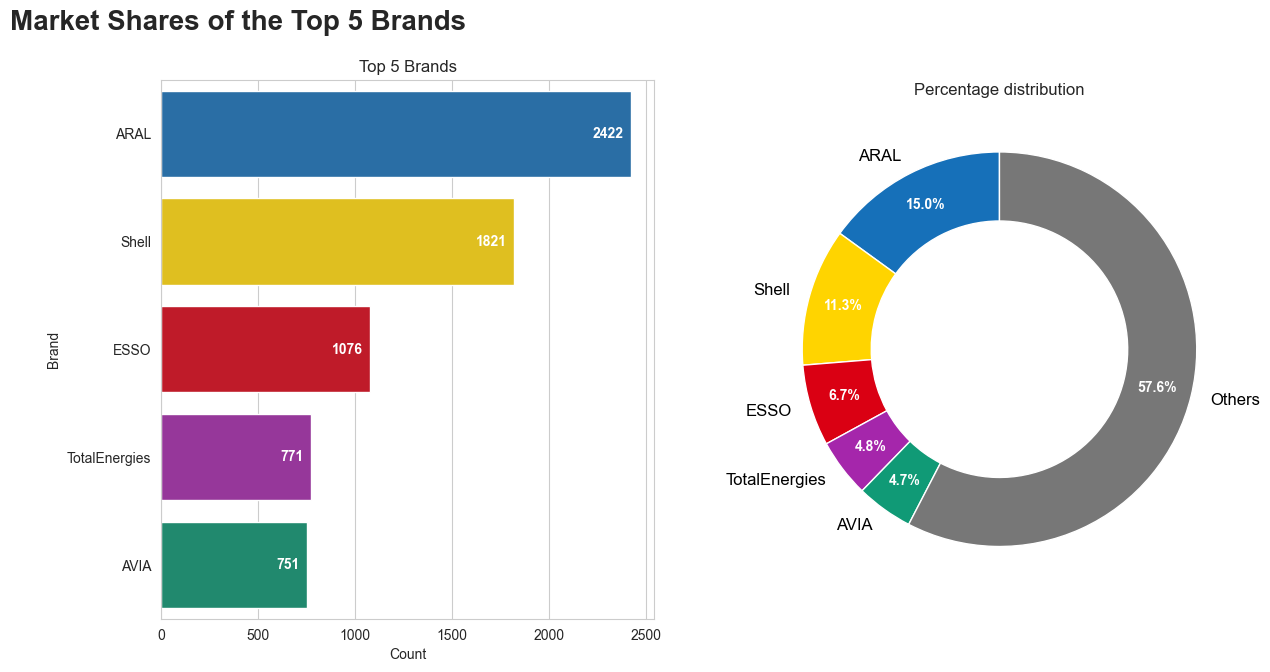

In [12]:
# for same size etc
title_fontsize = 20
width = 14

# Load the dataset
brand_stations = stations

# Filter for top 5 brands
top_brands = brand_stations.groupby('brand')['brand'].count().reset_index(name='count').nlargest(5, 'count')
top_brands_list = top_brands['brand'].unique()
rest_brands = brand_stations.loc[~brand_stations['brand'].isin(top_brands_list)].agg({'brand': 'count'}).reset_index()
rest_brands = rest_brands.rename(columns={'index': 'brand', 0 : 'count'})
rest_brands['brand'] = rest_brands['brand'].replace('brand', 'Others')

# colors for brands
custom_palette = ['#1670B9', '#FFD400', '#DA0013', '#A526AB', '#109A76', '#777777'] 

# creating figure
fig, ax = plt.subplots(1,2, figsize=(width,7))
sns.set_style('whitegrid')
title = fig.suptitle('Market Shares of the Top 5 Brands', fontsize= title_fontsize, fontweight= 'bold')
title.set_x(0.18)

# barplot
sns.barplot(data=top_brands, y='brand', x='count', ax= ax[0], palette= custom_palette)

# Add count inside each bar
for i, v in enumerate(top_brands['count']):
    ax[0].annotate(str(v), xy=(v, i), va='center', ha='right', fontsize=10, color='white', 
                xytext=(-5, 0), textcoords='offset points', fontweight= 'bold')

# Set plot attributes
ax[0].set(title='Top 5 Brands', xlabel='Count', ylabel='Brand')

# add rest
top_brands = top_brands.append(rest_brands)

# Create a donut 
sizes = top_brands['count']
labels = top_brands['brand']
colors = custom_palette[:len(sizes)]

# white circle
wedgeprops = {"edgecolor": "w", 'linewidth': 1, 'width': 0.35}
# set pie
_, lab, pct = ax[1].pie(sizes, labels=labels, colors=colors, startangle=90, 
                    wedgeprops=wedgeprops, autopct='%1.1f%%', pctdistance=0.82)

# set the color of the labels to red
plt.setp(lab, color='black', fontsize= 12)
plt.setp(pct, color='white', fontsize= 10, fontweight= 'bold')

# Set plot attributes
ax[1].set(title='Percentage distribution', 
       xlabel='', ylabel='')

# Show the plot
plt.show()

## Geographical Visualization of the Top 5 Gas Station Brands in Germany

Now that we know which gas station brands are most prevalent in Germany, their geographical distribution becomes of interest. The following plots represent the gas stations of the top 5 brands both as an overall view and broken down by brand.

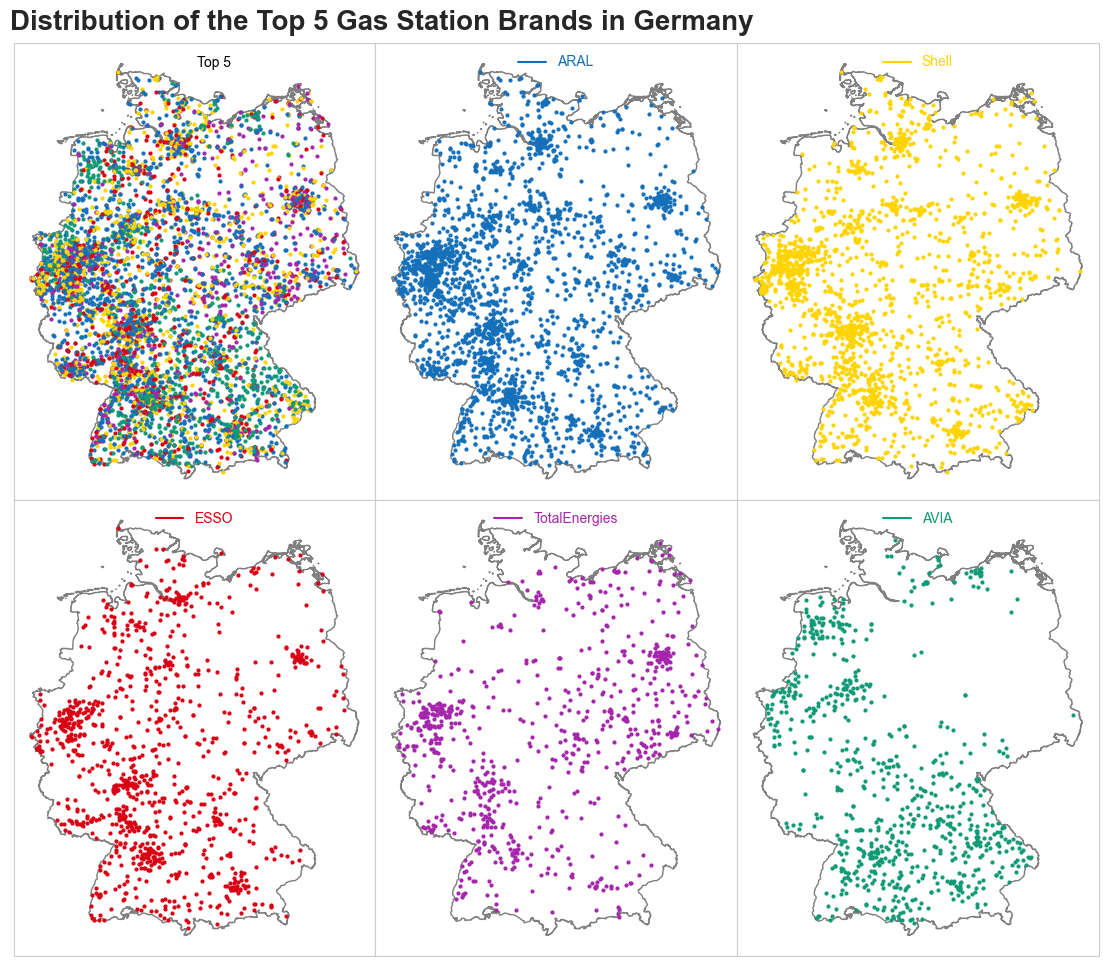

In [13]:
# Select only the top 5 brands and don't sort by count
top_brands = stations['brand'].value_counts(sort=False).nlargest(5).index.tolist()
df_map = stations[stations['brand'].isin(top_brands)]

fig, axes = plt.subplots(2,3, figsize=(width,11))
sns.set_style('whitegrid')

# add a title to the map
title = fig.suptitle('Distribution of the Top 5 Gas Station Brands in Germany', fontsize= title_fontsize, fontweight= 'bold')

shapefile_data = shapefile.Reader('DEU_adm0.shp')

# create legend labels and colors
stations_loop = ['Top 5'] + top_brands
legend_labels = top_brands
legend_colors = [custom_palette[top_brands.index(brand)] for brand in top_brands]

# adding dots based on latitudes and longitudes
for ax, string in zip(axes.flatten(),stations_loop):
    # drawn shape file
    poly= shapefile_data.shape()
    ax.add_patch(PolygonPatch(poly, fc='#ffffff', ec='#000000', alpha=0.5, zorder=2 ))

    # differ betwenn all and seperate
    if string == 'Top 5':   
        # print dots
        for t, row in df_map.iterrows():
            ax.plot(row['longitude'], row['latitude'], marker='o', markersize=2, 
                    color=custom_palette[top_brands.index(row['brand'])])
            
        # add legend without color
        handles_all = [plt.Line2D([], [], linestyle='', label=string, marker= 'None')]
        ax.legend(handles=handles_all, loc='upper center', ncol=len(legend_labels), labelcolor='black', frameon=False)

    else:
        # print dots
        for t, row in df_map[df_map.brand == string].iterrows():
            ax.plot(row['longitude'], row['latitude'], marker='o', markersize=2, 
                    color=custom_palette[top_brands.index(row['brand'])])
        
        # add legend to the map
        handles = [plt.Line2D([], [], linestyle='-', label=string, color=custom_palette[top_brands.index(string)])]
        ax.legend(handles=handles, loc='upper center', ncol=len(legend_labels), labelcolor=custom_palette[top_brands.index(string)], frameon=False)
            
    # Remove stuff around
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust spacing
fig.subplots_adjust(top=0.94, hspace=0 , wspace=0)
title.set_y(0.97)
title.set_x(0.388)

# plotting
plt.show()

Germany has a widespread network of gas stations, but it is unevenly distributed across different regions. Particularly in the Ruhr area, Berlin, Frankfurt, and other densely populated areas, there are numerous gas stations. In comparison, the number of gas stations in less populated regions, such as Mecklenburg-Vorpommern, is relatively low. There are also differences between the East and West, as there are fewer gas stations in eastern Germany, and not all top 5 gas station brands, such as AVIA, are represented there. The geomap illustrates the distribution of the top 5 gas station brands in Germany and highlights the lingering infrastructure differences between the East and West that still exist in some parts today.

## Current fuel price comparison of brands

We suspected that fuel prices in the new states (former East Germany) might be lower compared to the old states (former West Germany), as is often the case with other commodities such as real estate. To verify this, we created a bar chart showing the average prices of fuels per state. The average prices are based on the data from March 2023. Since the original dataset does not include states, an external dataset is required that associates each postal code with a state. The postal code serves as a key to merge the two datasets. We could have also used the city as a key, but there is a possibility that different cities have the same name. Therefore, we chose the unique postal codes as the key. However, not only the comparison between East and West Germany could be interesting, but also the comparison between all 16 federal states. Hence, we aggregated the prices only up to the state level.

C:\Users\PhilippMeyer\AppData\Local\Temp\ipykernel_20092\617723329.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_means = april_2023.groupby('station_uuid').mean().reset_index()
C:\Users\PhilippMeyer\AppData\Local\Temp\ipykernel_20092\617723329.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_postcode_means = month_means.astype({'post_code': 'int'}).groupby('post_code').mean().reset_index()
C:\Users\PhilippMeyer\AppData\Local\Temp\ipykernel_20092\617723329.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 ch

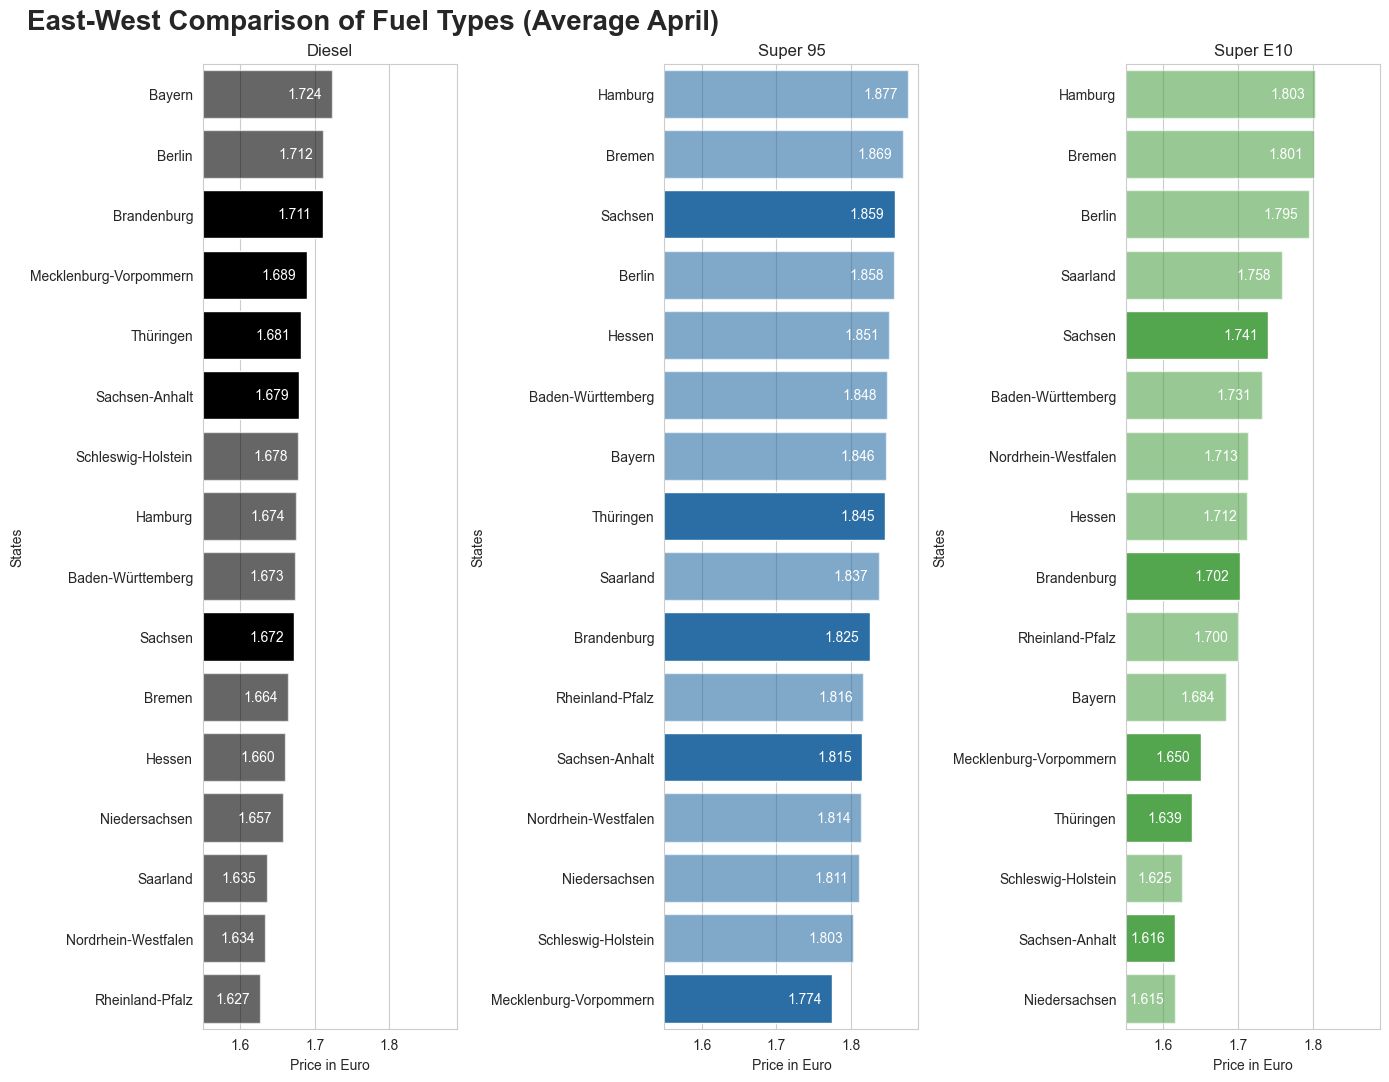

In [14]:
# mean per station
month_means = april_2023.groupby('station_uuid').mean().reset_index()

# adding postcode to stations
month_means = month_means.merge(stations[['station_uuid', 'post_code']], on='station_uuid')

# mean by postcode
month_postcode_means = month_means.astype({'post_code': 'int'}).groupby('post_code').mean().reset_index()

# merging postcode to Bundesländer + calculating mean of it 
plz_bundesland = pd.read_csv('plz-buland-kreis.csv', delimiter= '\;')
plz_bundesland = plz_bundesland[['plz', 'bundesland']].drop_duplicates().rename(columns={'plz': 'post_code'})
bundland_preise = month_postcode_means.merge(plz_bundesland, on='post_code').groupby('bundesland').mean().reset_index()

# creating a figure to have three barplots next to each other + title
fig, ax = plt.subplots(1, 3, figsize=(width, 11))
sns.set_style('whitegrid')
title = fig.suptitle('East-West Comparison of Fuel Types (Average April)', fontsize= title_fontsize, fontweight= 'bold')
title.set_x(0.27)

# for iterating 
fuelTypes = ['diesel', 'e5', 'e10'] 

# color codes for fuel types 
colors = ['#000000', '#1670B9', '#46b340'] 

# adding transperancy column 
neue_laender = ["Brandenburg", "Mecklenburg-Vorpommern", "Sachsen", "Sachsen-Anhalt", "Thüringen"]
bundland_preise['alpha'] = bundland_preise['bundesland'].apply(lambda x: 1 if x in neue_laender else 0.6)

# plotting a barplot per fuelType 
for i, fuelType in enumerate(fuelTypes):
    bundland_preise_sorted = bundland_preise.sort_values(by=fuelType, ascending=False)
    sns.barplot(data=bundland_preise_sorted, y='bundesland', x=fuelType, color=colors[i], ax=ax[i],
                order=bundland_preise_sorted['bundesland'])
    
    # correct the x-ax
    ax[i].set_xlim(1.55, 1.89)

    # modifying alpha based on alpha column and text in the bars with annotate 
    for bar, alpha in zip(ax[i].patches, bundland_preise_sorted['alpha']):
        bar.set_alpha(alpha)
        ax[i].annotate("%.3f" % bar.get_width(), xy=(bar.get_width(), bar.get_y()+bar.get_height()/2),
                       xytext=(-45, 0), textcoords='offset pixels', ha="left", va="center", color='white')
        
# array for wanted fuel types 
fuelTypes_label = ['Diesel', 'Super 95', 'Super E10']

# form changes
for i, fuelType_label in enumerate(fuelTypes_label):
    ax[i].set(title=fuelType_label, ylabel= 'States', xlabel= 'Price in Euro')

# plotting
plt.tight_layout()    
plt.show()

In the upper plots, the eastern states are highlighted by a more intense color tone.
Based on the plot, it can be observed that the fuel type Diesel is relatively more expensive in the eastern states. Starting with Brandenburg and ending with Saxony-Anhalt, four out of the five eastern states, with the exception of Saxony, rank 3rd to 6th in the price comparison. However, this observation does not apply to the gasoline group, consisting of Super 95 and Super E10. In this case, the eastern states tend to fall into the cheaper half.

## Price development of fuels

In the following, we want to illustrate the price development of different types of fuels, namely Diesel, Super 95, and Super E10. Additionally, we will focus on the price development under the influence of the Ukraine crisis by zooming in on the time period starting from 2021, which will be presented as a secondary visualization.
The line charts will display the average prices of Diesel, Super 95, and Super E10 on the y-axis, while the x-axis represents the time period. The visualizations will allow us to compare the price trends before and after the onset of the Ukraine crisis, providing a clearer understanding of the relationship between geopolitical events and fuel prices.
This analysis will contribute to a comprehensive overview of the price development of different fuel types and provide valuable insights into the dynamics of the energy market during a period of significant geopolitical influence.

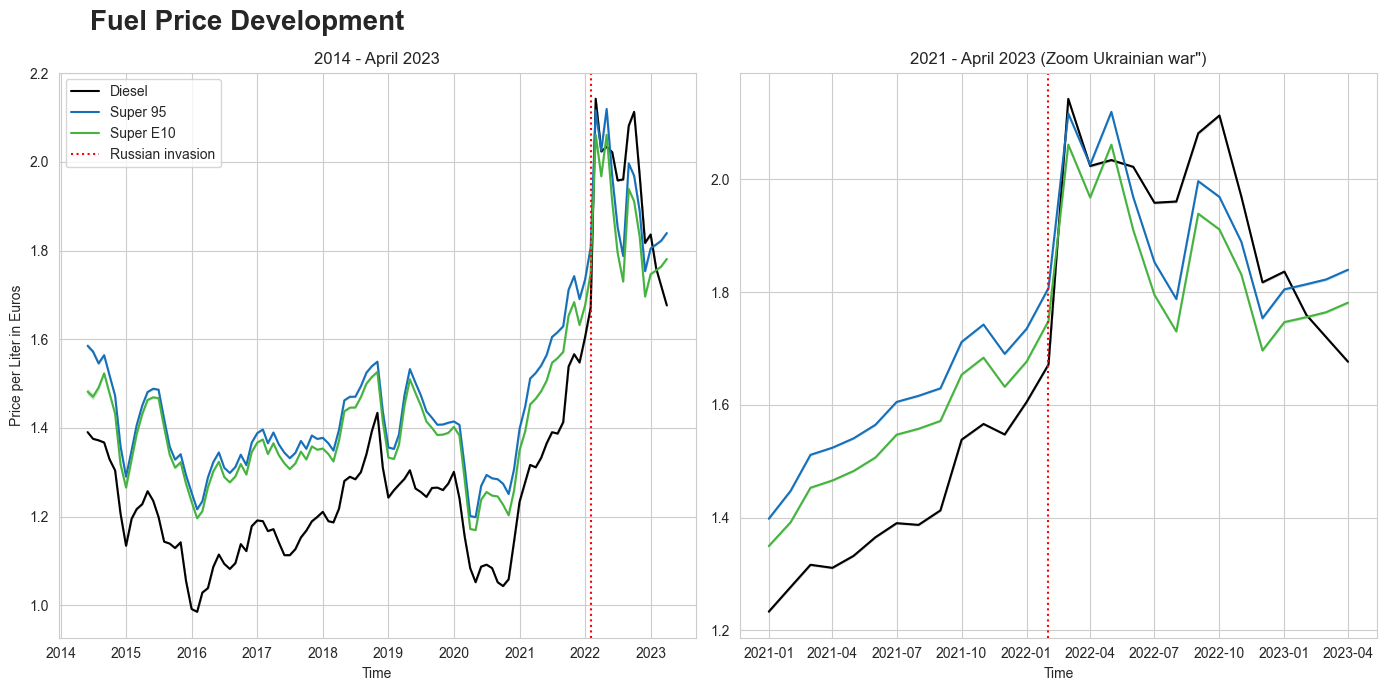

In [15]:
# creating df with wanted vars
preisentwicklung = timeseries[['date', 'diesel', 'e10', 'e5']]

# creating figure
fig, ax = plt.subplots(1,2, figsize=(width,7))
sns.set_style('whitegrid')

# style an form changes 
title = fig.suptitle('Fuel Price Development', fontsize= title_fontsize, fontweight= 'bold')
title.set_x(0.18)

# creating line plots 
for fuelType, label, color in zip(fuelTypes,fuelTypes_label, colors):
    sns.lineplot(data=preisentwicklung, x='date', y=fuelType, label=label,ax= ax[0], color= color )
    sns.lineplot(data=preisentwicklung[preisentwicklung.date >= '2021-01-01'], 
                 x= 'date', y= fuelType, ax= ax[1], color= color )
    
line_label = 'Russian invasion'    
line_date = datetime.strptime('2022 02', '%Y %m')
ax[0].axvline(x=line_date, color='red', linestyle='dotted', label= line_label)
ax[1].axvline(x=line_date, color='red', linestyle='dotted')

# Add legend
ax[0].legend()

# style and form changes after plotting 
ax[0].set(title= '2014 - April 2023', xlabel='Time', ylabel='Price per Liter in Euros')
ax[1].set(title= '2021 - April 2023 (Zoom Ukrainian war")', xlabel='Time', ylabel='')

# plotting
plt.tight_layout()
plt.show()

The two upper graphs illustrate the price developments of the three primary fuels: Diesel, Super 95, and Super E10. The x-axis represents time in years, while the y-axis provides information about the price per liter in Euro. The graphs indicate that, with a few exceptions, Diesel is the cheapest fuel, while Super 95 is the most expensive.

The more detailed representation of the axes in the right plot resembles a zoom effect, focusing on the period from 2021 to the present. This period is notable due to the significant price increase triggered by the Russian aggression against Ukraine and the multitude of factors influencing prices.

At the beginning of 2022, there was a rise in fuel prices based on the increase in oil prices due to positive economic outlooks. The sharp increase in fuel prices following February 24, 2022, can be explained as follows: The fear of energy supply shortages due to the then-pending sanctions led to price explosions in oil and gas. The extent of the situation was not yet known at that time. The fear of energy scarcity and the increased willingness of buyers to pay higher prices led investors to speculate on rising prices, which, to some extent, contributed to the price increase.